# HToMuMu Feature Exploration
Let's look at our different feature variables to see which might be helpful discriminators. We can also verify that the cuts we're using for our categories are reasonable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in all signal and background MC in our signal region (120 to 130 GeV)
I exported the signal and background events in 110 to 160 GeV to a csv file. When an event is outside the signal region then bin < 0. if the event is inside the signal region bin is >=0.

In [2]:
df = pd.read_csv('data/all_sig_and_bkg_in_110_to_160_GeV.csv')
df = df[df.bin >= 0] # only look at those in signal region

## Extract the signal and background into different datasets

In [3]:
bkgdf = df[df.is_signal <= 0]
sigdf = df[df.is_signal > 0]
bkgdf.describe()

,Unnamed: 0,MET,MHT,MT_had,bdt_ewk_score,bdt_ggh_score,bdt_score,bdt_top_score,bdt_vbf_score,bdt_vh_score,...,vbf_dEta_jj_mumu,vbf_dPhi_jj_mumu,vbf_jet0_eta,vbf_jet0_pt,vbf_jet1_eta,vbf_jet1_pt,vbf_m_jj,vbf_zep,weight,zep
count,287296.000000,287296.000000,287296.000000,287296.000000,287296.0,287296.0,287296.000000,287296.0,287296.0,287296.0,...,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000,287296.000000
mean,73498.634663,50.409537,50.090637,294.196185,-999.0,-999.0,-0.102331,-999.0,-999.0,-999.0,...,-439.179315,-439.002554,-177.711617,-112.312555,-440.229545,-413.549318,-282.627355,-440.231715,0.410559,-440.231246
std,66135.618839,45.062444,45.239827,452.126088,0.0,0.0,0.457312,0.0,0.0,0.0,...,496.906128,497.062137,382.036777,415.619051,495.974879,519.961080,690.277023,495.971684,1.242205,495.971824
min,0.000000,0.095115,0.060625,0.000000,-999.0,-999.0,-0.939102,-999.0,-999.0,-999.0,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-5.113890,-999.000000
25%,21290.000000,21.978450,21.182400,39.584125,-999.0,-999.0,-0.467771,-999.0,-999.0,-999.0,...,-999.000000,-999.000000,-2.392307,37.210900,-999.000000,-999.000000,-999.000000,-999.000000,-0.000441,-999.000000
50%,52745.500000,37.529150,38.148000,129.851000,-999.0,-999.0,-0.038109,-999.0,-999.0,-999.0,...,0.284976,0.818610,-0.490671,54.089300,-2.668015,31.416850,64.514150,-1.745940,0.012045,-1.412510
75%,108455.250000,64.497400,64.938950,357.222250,-999.0,-999.0,0.253666,-999.0,-999.0,-999.0,...,1.712312,2.598463,0.909331,83.222825,0.289460,41.635950,164.533250,0.158219,0.581701,0.145088
max,268867.000000,3658.390000,3657.170000,8268.900000,-999.0,-999.0,0.905091,-999.0,-999.0,-999.0,...,11.833500,3.141590,4.698260,1468.750000,4.696570,999.756000,7568.190000,4.651930,5.136790,4.651930


## List the available features
if you were curious which ones were saved then here ya go

In [10]:
for col in bkgdf.columns:
    print col

Unnamed: 0
MET
MHT
MT_had
bdt_ewk_score
bdt_ggh_score
bdt_score
bdt_top_score
bdt_vbf_score
bdt_vh_score
bin
bjet0_eta
bjet0_pt
bjet1_eta
bjet1_pt
dEta_bb
dEta_jj
dEta_jj_mumu
dPhi_jj_mumu
dijet1_abs_dEta
dijet1_dEta
dijet1_mass
dijet1_max_abs_eta
dijet1_min_abs_eta
dijet1_pt
dijet2_abs_dEta
dijet2_dEta
dijet2_mass
dijet2_max_abs_eta
dijet2_min_abs_eta
dijet2_pt
dijet3_abs_dEta
dijet3_dEta
dijet3_mass
dijet3_max_abs_eta
dijet3_min_abs_eta
dijet3_pt
dijet4_abs_dEta
dijet4_dEta
dijet4_mass
dijet4_max_abs_eta
dijet4_min_abs_eta
dijet4_pt
dimu_abs_dEta
dimu_abs_dPhi
dimu_abs_eta
dimu_avg_abs_eta
dimu_dEta
dimu_dPhi
dimu_dPhiStar
dimu_dR
dimu_eta
dimu_mass
dimu_mass_KaMu
dimu_mass_Roch
dimu_max_abs_eta
dimu_min_abs_eta
dimu_pt
dimu_rapid
electron0_eta
electron0_pt
electron1_eta
electron1_pt
extra_muon0_eta
extra_muon0_pt
extra_muon1_eta
extra_muon1_pt
is_signal
jet1_abs_eta
jet1_eta
jet1_pt
jet2_abs_eta
jet2_eta
jet2_pt
jet3_abs_eta
jet3_eta
jet3_pt
jet4_abs_eta
jet4_eta
jet4_pt
jj_jet0_eta

# Make The Plots!! [Signal = Green, Background = Blue]
Let's look at the differences in the signal and background distributions for the different features. If the signal and background distributions are different then we have some discriminating power.
## MET

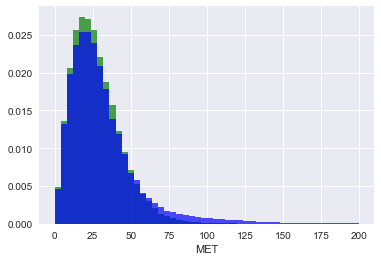

In [5]:
%matplotlib inline
sns.distplot(sigdf.MET, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'weights': sigdf.weight, 'alpha': 0.7, 'range': (0,200)})
sns.distplot(bkgdf.MET, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'weights': bkgdf.weight, 'alpha': 0.7, 'range': (0,200)})

## Muon Info
mu0 is leading mu1 is subleading

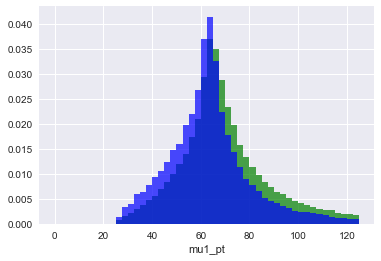

In [11]:
sns.distplot(sigdf.mu1_pt, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0,125), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mu1_pt, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,125), 'weights': bkgdf.weight, 'alpha': 0.7})

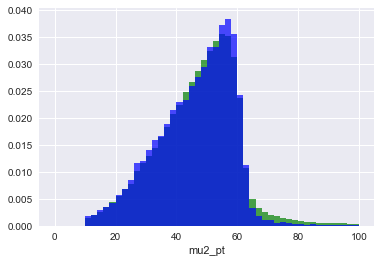

In [12]:
sns.distplot(sigdf.mu2_pt, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0, 100), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mu2_pt, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,100), 'weights': bkgdf.weight, 'alpha': 0.7})

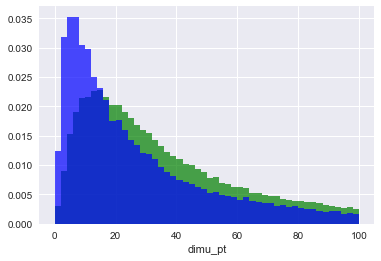

In [13]:
sns.distplot(sigdf.dimu_pt, kde=False, norm_hist=True, bins=50, color='green', hist_kws={'range': (0, 100), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dimu_pt, kde=False, norm_hist=True, bins=50, color='blue', hist_kws={'range': (0,100), 'weights': bkgdf.weight, 'alpha': 0.7})

## Phi Star
Characterizes the angle between the muons in the parent's rest frame.

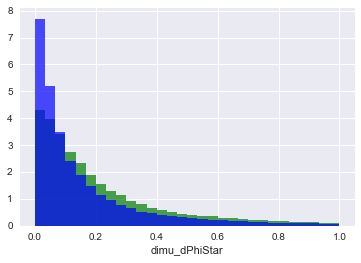

In [16]:
sns.distplot(sigdf.dimu_dPhiStar, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,1),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dimu_dPhiStar, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,1),'weights': bkgdf.weight, 'alpha': 0.7})

## Jet Info

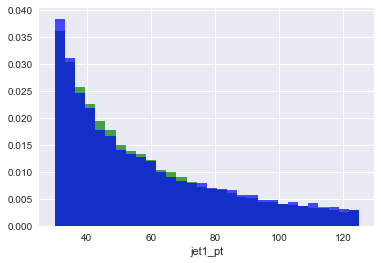

In [18]:
sns.distplot(sigdf.jet1_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (30,125),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.jet1_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (30,125),'weights': bkgdf.weight, 'alpha': 0.7})

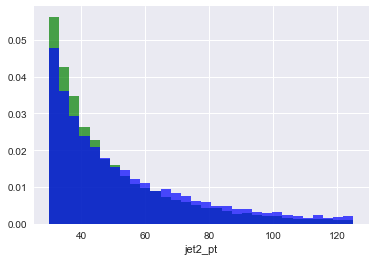

In [19]:
sns.distplot(sigdf.jet2_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (30,125), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.jet2_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (30,125), 'weights': bkgdf.weight, 'alpha': 0.7})

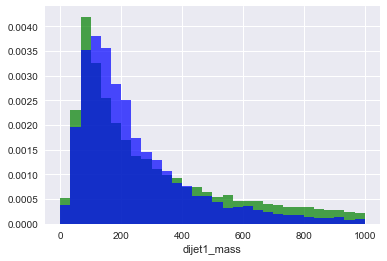

In [21]:
sns.distplot(sigdf.dijet1_mass, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (1,1000),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dijet1_mass, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (1,1000),'weights': bkgdf.weight, 'alpha': 0.7})

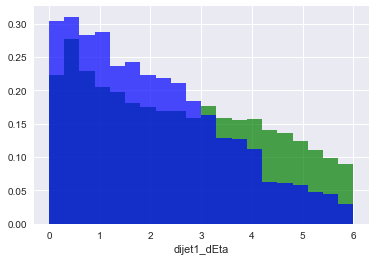

In [22]:
sns.distplot(sigdf.dijet1_dEta, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,6),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dijet1_dEta, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,6),'weights': bkgdf.weight, 'alpha': 0.7})

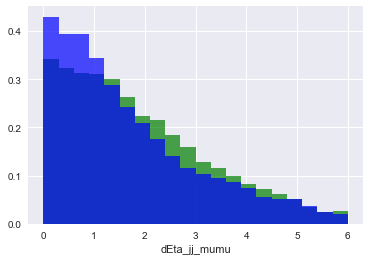

In [23]:
sns.distplot(sigdf.dEta_jj_mumu, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,6),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dEta_jj_mumu, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,6),'weights': bkgdf.weight, 'alpha': 0.7})

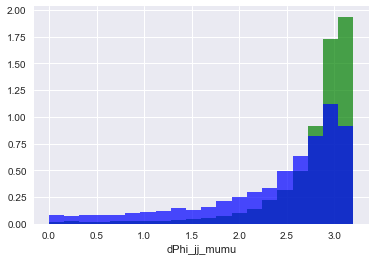

In [24]:
sns.distplot(sigdf.dPhi_jj_mumu, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,3.2),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dPhi_jj_mumu, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,3.2),'weights': bkgdf.weight, 'alpha': 0.7})

## VBF Jets

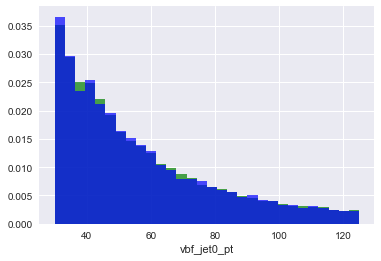

In [25]:
sns.distplot(sigdf.vbf_jet0_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (30,125),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.vbf_jet0_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (30,125),'weights': bkgdf.weight, 'alpha': 0.7})

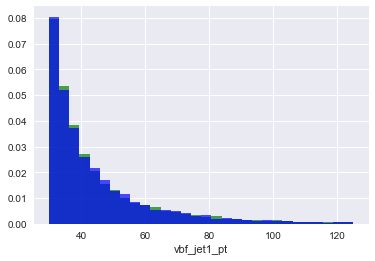

In [26]:
sns.distplot(sigdf.vbf_jet1_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (30,125), 'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.vbf_jet1_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (30,125), 'weights': bkgdf.weight, 'alpha': 0.7})

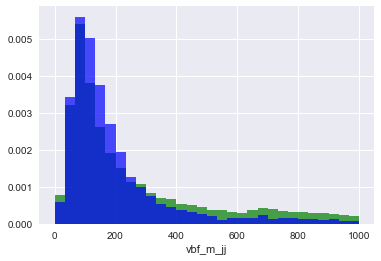

In [27]:
sns.distplot(sigdf.vbf_m_jj, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,1000),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.vbf_m_jj, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,1000),'weights': bkgdf.weight, 'alpha': 0.7})

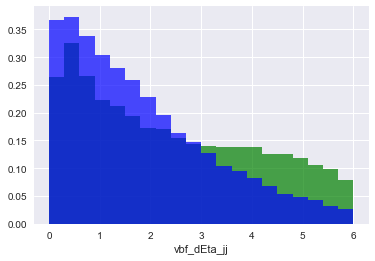

In [28]:
sns.distplot(sigdf.vbf_dEta_jj, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,6),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.vbf_dEta_jj, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,6),'weights': bkgdf.weight, 'alpha': 0.7})

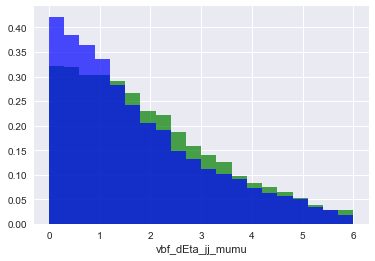

In [30]:
sns.distplot(sigdf.vbf_dEta_jj_mumu, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,6),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.vbf_dEta_jj_mumu, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,6),'weights': bkgdf.weight, 'alpha': 0.7})

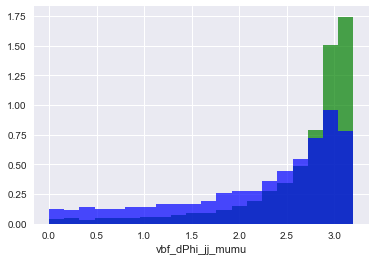

In [32]:
sns.distplot(sigdf.vbf_dPhi_jj_mumu, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,3.2),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.vbf_dPhi_jj_mumu, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,3.2),'weights': bkgdf.weight, 'alpha': 0.7})

## B-Jet Info

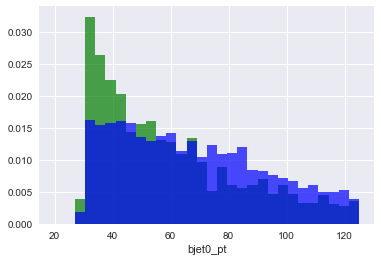

In [33]:
sns.distplot(sigdf.bjet0_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (20,125),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.bjet0_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (20,125),'weights': bkgdf.weight, 'alpha': 0.7})

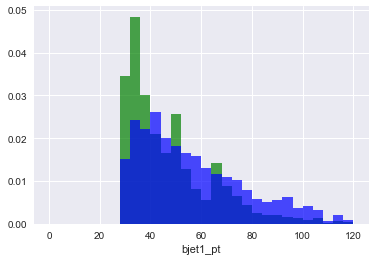

In [34]:
sns.distplot(sigdf.bjet1_pt, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,120),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.bjet1_pt, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,120),'weights': bkgdf.weight, 'alpha': 0.7})

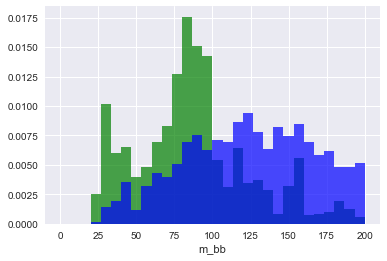

In [35]:
sns.distplot(sigdf.m_bb, kde=False, norm_hist=True, bins=30, color='green', hist_kws={'range': (0,200),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.m_bb, kde=False, norm_hist=True, bins=30, color='blue', hist_kws={'range': (0,200),'weights': bkgdf.weight, 'alpha': 0.7})

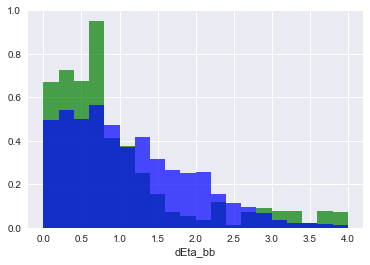

In [36]:
sns.distplot(sigdf.dEta_bb, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,4),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.dEta_bb, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,4),'weights': bkgdf.weight, 'alpha': 0.7})

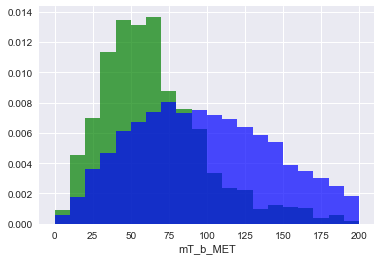

In [37]:
sigdf.columns
sns.distplot(sigdf.mT_b_MET, kde=False, norm_hist=True, bins=20, color='green', hist_kws={'range': (0,200),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.mT_b_MET, kde=False, norm_hist=True, bins=20, color='blue', hist_kws={'range': (0,200),'weights': bkgdf.weight, 'alpha': 0.7})

## Object Counts

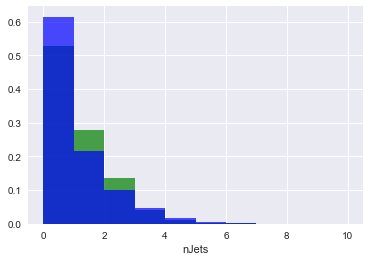

In [39]:
sns.distplot(sigdf.nJets, kde=False, norm_hist=True, bins=10, color='green', hist_kws={'range': (0,10),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.nJets, kde=False, norm_hist=True, bins=10, color='blue', hist_kws={'range': (0,10),'weights': bkgdf.weight, 'alpha': 0.7})

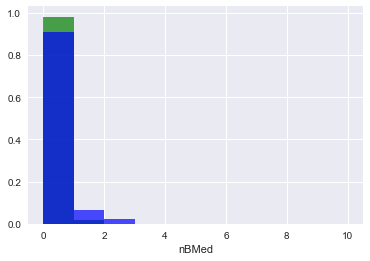

In [41]:
sns.distplot(sigdf.nBMed, kde=False, norm_hist=True, bins=10, color='green', hist_kws={'range': (0,10),'weights': sigdf.weight, 'alpha': 0.7})
sns.distplot(bkgdf.nBMed, kde=False, norm_hist=True, bins=10, color='blue', hist_kws={'range': (0,10),'weights': bkgdf.weight, 'alpha': 0.7})

## 2D Plots

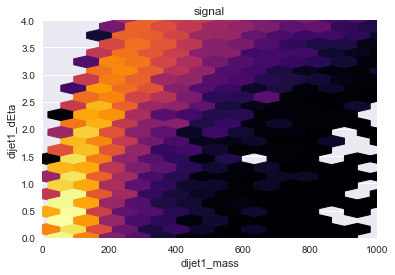

In [44]:
sigdfj = sigdf[sigdf.nJets > 1]
bkgdfj = bkgdf[bkgdf.nJets > 1]
plt.xlim(0,1000)
plt.ylim(0,4)
plt.xlabel('dijet1_mass')
plt.ylabel('dijet1_dEta')
plt.title('signal')
plt.hexbin(sigdfj.dijet1_mass, sigdfj.dijet1_dEta, gridsize=100, bins='log', C=sigdfj.weight.apply(lambda x: x*1e2), reduce_C_function=np.sum, cmap='inferno')

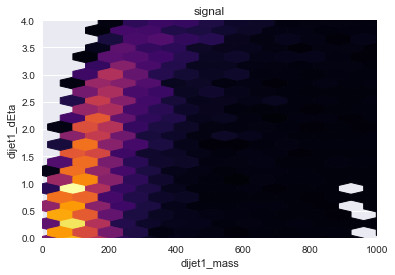

In [62]:
sigdfj = sigdf[sigdf.nJets > 1]
bkgdfj = bkgdf[bkgdf.nJets > 1]
plt.xlim(0,1000)
plt.ylim(0,4)
plt.xlabel('dijet1_mass')
plt.ylabel('dijet1_dEta')
plt.title('signal')
plt.hexbin(bkgdfj.dijet1_mass, bkgdfj.dijet1_dEta, gridsize=100, bins='log', C=bkgdfj.weight.apply(lambda x: x*0.01e-1), reduce_C_function=np.sum, cmap='inferno')

In [ ]:
len(df.columns)